# Final Exam - Titanic

Course: AP4063

Student Number: 109601003

Name: 林群賀

#### Baseline: 0.78708

## Import the package

In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data sets.

In [82]:
data_path = os.getcwd()
train_data_path = data_path + '/data/titanic_train.csv'
test_data_path = data_path + '/data/titanic_test.csv'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Plot charts between multiple variables

### age

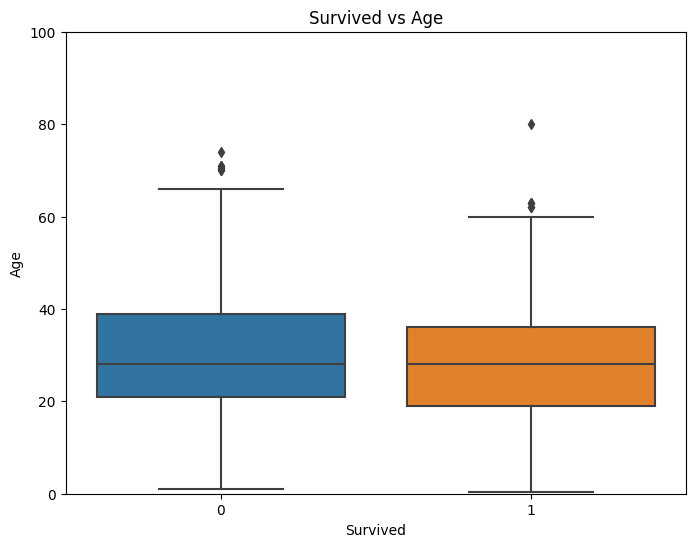

In [84]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Age', data=df_train)
ax.set_ylim(0,100)
plt.title("Survived vs Age")
plt.show()

### Sex

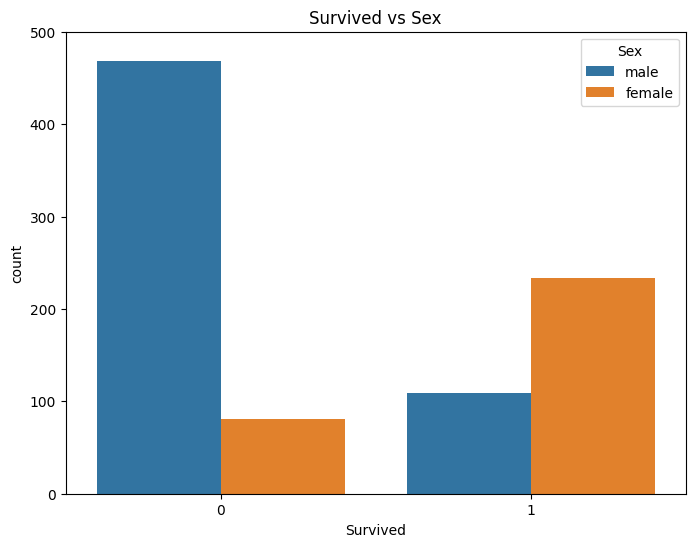

In [85]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Sex', data=df_train)
ax.set_ylim(0,500)
plt.title("Survived vs Sex")
plt.show()

### Pclass


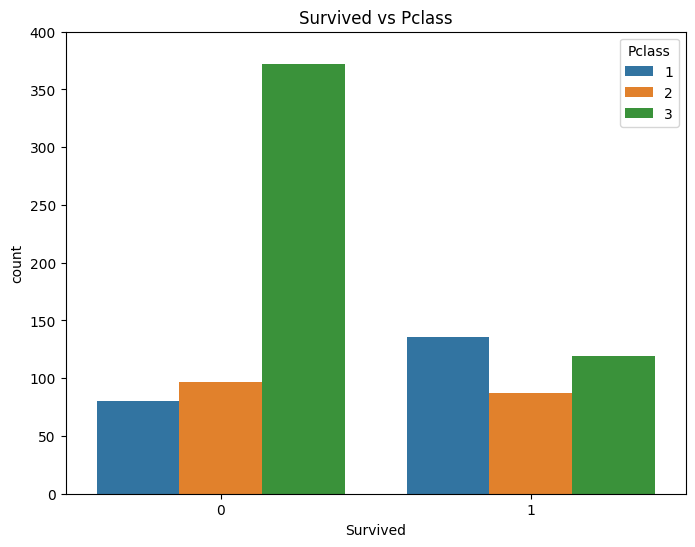

In [86]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Pclass', data=df_train)
ax.set_ylim(0,400)
plt.title("Survived vs Pclass")
plt.show()

### Embarked

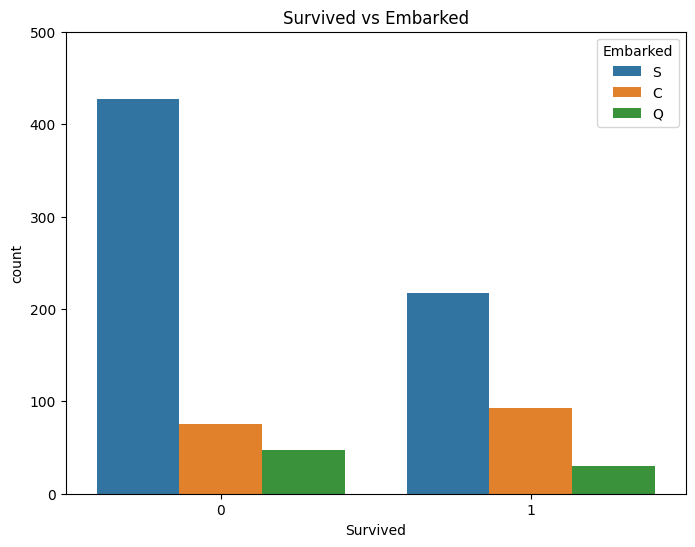

In [87]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Embarked', data=df_train)
ax.set_ylim(0,500)
plt.title("Survived vs Embarked")
plt.show()

In [88]:
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket','Cabin'] , axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket','Cabin'] , axis=1)

combine = [df_train, df_test]

for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [89]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,2
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3


In [90]:
df_train = df_train.drop(['SibSp', 'Parch'] , axis=1)
df_test = df_test.drop(['SibSp', 'Parch',] , axis=1)

In [91]:
df = pd.concat([df_train,df_test])

df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1


In [92]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

MMEncoder = MinMaxScaler()
LEncoder = LabelEncoder()

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else:
        df[c] = df[c].fillna(-1)
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))

df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1.0,1.0,0.283951,0.016072,1.0,0.1
1,0.0,0.0,0.481481,0.140813,0.0,0.1
2,1.0,0.0,0.333333,0.017387,1.0,0.0
3,0.0,0.0,0.444444,0.105390,1.0,0.1
4,1.0,1.0,0.444444,0.017630,1.0,0.0


## Prediction

#### With the Gradient Boosting Machine Model

In [93]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

clf = GradientBoostingClassifier()
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
pred = np.array(pred)

## Output the Results

In [94]:
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.to_csv(data_path + '/data/my_result/Titanic_1111_finalexam.csv', index=False) 

## My Result

#### The screenshot

![the result](./data/my_result/Titanic_1111_finalexam.png)

## What I have tried?

1. 
   In the progress, I have tried using the "Random Forest" model, but it was less accurate than the baseline. 
   
   To improve the accuracy, I searched for various methods and found the article "Titanic Competition: Journey to 100% Accuracy". 
   
   In this article, the author pre-processed many variables, especially "Name," "Sex," "SibSp," "Parch," and "Age." He/She combined the names into new titles and considered the correlation between age and sex. This led to increased accuracy in the Random Forest model. 
   
   Overall, I learned that imbalanced data can negatively impact the accuracy of "Random Forest" and can lead to overfitting due to the presence of noise. To improve the accuracy of the model, I must be more careful in observing data types and ensure the data is balanced.

2. 
   Finally, the only selection was to combine 'SibSp', 'Parch' and still implemented through gradient boosting model. At first, when I saw this method, I thought it was quite cool. 
   
   After all, having children and having relatives are two relationships with a lot of possibilities, and it is possible that there are overlapping possibilities. So, combining them together is a choice that may be worth trying to deal with the data.

## Reference

[Titanic Competition [Journey to 100% Accuracy]](https://www.kaggle.com/code/amerwafiy/titanic-competition-journey-to-100-accuracy)

[[機器學習專案] Kaggle競賽-鐵達尼號生存預測(Top 3%)](https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f)

[[資料分析&機器學習] 第4.1講 : Kaggle競賽-鐵達尼號生存預測(前16%排名)](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077)